## <div align="center"> Project </div>
## <div align="center"> Data Analysis : [Identifikasi Faktor Risiko Depresi pada Individu Berdasarkan Faktor Sosial-Demografi dan Gaya Hidup]</div>
#### <div align="center"> Semester Ganjil 2023/2024 </div>
---

In [2]:
import datetime
import uuid

studentName = "Delista Dwi Widyastuti"
studentNIM = "00000105174"
studentClass = "IS388-DL"

In [3]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(studentName))
print("NIM: \t\t{}".format(studentNIM))
print("Class: \t\t{}".format(studentClass))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Delista Dwi Widyastuti
NIM: 		00000105174
Class: 		IS388-DL
Start: 		2024-12-25 15:59:05.950256
Device ID: 	7ec911e9-c29e-11ef-a496-c01850591c47


---

## <div align="center"> Project </div>

## Question 1: Sub-CLO 1

## Import Library

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Import Dataset

In [10]:
df = pd.read_csv('depression_data.csv')
df

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


## Question 2: Sub-CLO 2

## Data Preprocessing

## Cek Missing Values

In [14]:
df.isna().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

#### Setelah melakukan cek missing values ternyata tidak mendapatkan adanya missing values maka dari itu tidak perlu ada penanganan missing values

## Melakukan Encoding

Melakukan Encoding untuk mengubah kolom kategorikal menjadi Numerik menggunakan Label Encoder

In [18]:
label_encoder = LabelEncoder()
categorical_cols = ['Alcohol Consumption', 'Dietary Habits', 'History of Mental Illness', 
                    'History of Substance Abuse', 'Marital Status', 'Education Level', 'Sleep Patterns', 'Smoking Status', 
                    'Chronic Medical Conditions', 'Family History of Depression', 'Physical Activity Level', 'Employment Status']
label_encoders = {}
for col in categorical_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

for col, encoder in label_encoders.items():
    joblib.dump(encoder, f'label_encoder_{col}.pkl')

## Binning

In [20]:
bins = [0, 30, 60, 100]
labels = ['Muda', 'Dewasa', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Group
0,Christine Barker,31,1,1,2,2,0,1,26265.67,2,1,0,1,0,1,1,Dewasa
1,Jacqueline Lewis,55,1,2,1,2,2,0,42710.36,0,2,0,1,0,0,1,Dewasa
2,Shannon Church,78,3,3,1,2,2,0,125332.79,1,2,1,0,0,1,0,Senior
3,Charles Jordan,58,0,3,3,2,1,1,9992.78,2,1,2,0,0,0,0,Dewasa
4,Michael Rich,18,2,2,0,2,2,1,8595.08,1,1,0,1,0,1,1,Muda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,1,3,0,1,1,0,109233.43,1,0,1,0,0,0,0,Senior
413764,Christina Brown,26,2,1,0,0,0,0,96760.97,1,0,2,1,1,0,1,Muda
413765,Matthew Jenkins,57,1,1,0,2,2,0,77353.26,2,1,0,0,0,1,1,Dewasa
413766,Gary Faulkner,71,1,0,2,2,2,1,24557.08,2,1,2,0,1,0,0,Senior


## Grouping

In [22]:
grouped = df.groupby('Age Group', observed=False)['Income'].mean()
grouped

Age Group
Muda      46641.519233
Dewasa    56334.413643
Senior    44814.984054
Name: Income, dtype: float64

## Normalisasi

Melakukan Normalisasi menggunakan StandardScaler bertujuan untuk menstandarisasi data

In [25]:
scaler = StandardScaler()
df[['Age', 'Income', 'Number of Children']] = scaler.fit_transform(df[['Age', 'Income', 'Number of Children']])
df

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Group
0,Christine Barker,-0.991298,1,1,0.566692,2,0,1,-0.600532,2,1,0,1,0,1,1,Dewasa
1,Jacqueline Lewis,0.330380,1,2,-0.241681,2,2,0,-0.195730,0,2,0,1,0,0,1,Dewasa
2,Shannon Church,1.596988,3,3,-0.241681,2,2,0,1.838100,1,2,1,0,0,1,0,Senior
3,Charles Jordan,0.495590,0,3,1.375065,2,1,1,-1.001105,2,1,2,0,0,0,0,Dewasa
4,Michael Rich,-1.707206,2,2,-1.050054,2,2,1,-1.035510,1,1,0,1,0,1,1,Muda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,1.046289,1,3,-1.050054,1,1,0,1.441799,1,0,1,0,0,0,0,Senior
413764,Christina Brown,-1.266647,2,1,-1.050054,0,0,0,1.134778,1,0,2,1,1,0,1,Muda
413765,Matthew Jenkins,0.440520,1,1,-1.050054,2,2,0,0.657038,2,1,0,0,0,1,1,Dewasa
413766,Gary Faulkner,1.211499,1,0,0.566692,2,2,1,-0.642590,2,1,2,0,1,0,0,Senior


## Penangan Outlier

### Visualisasi boxplot untuk cek outlier 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Marital Status'),
  Text(2, 0, 'Education Level'),
  Text(3, 0, 'Number of Children'),
  Text(4, 0, 'Smoking Status'),
  Text(5, 0, 'Physical Activity Level'),
  Text(6, 0, 'Employment Status'),
  Text(7, 0, 'Income'),
  Text(8, 0, 'Alcohol Consumption'),
  Text(9, 0, 'Dietary Habits'),
  Text(10, 0, 'Sleep Patterns'),
  Text(11, 0, 'History of Mental Illness'),
  Text(12, 0, 'History of Substance Abuse'),
  Text(13, 0, 'Family History of Depression'),
  Text(14, 0, 'Chronic Medical Conditions')])

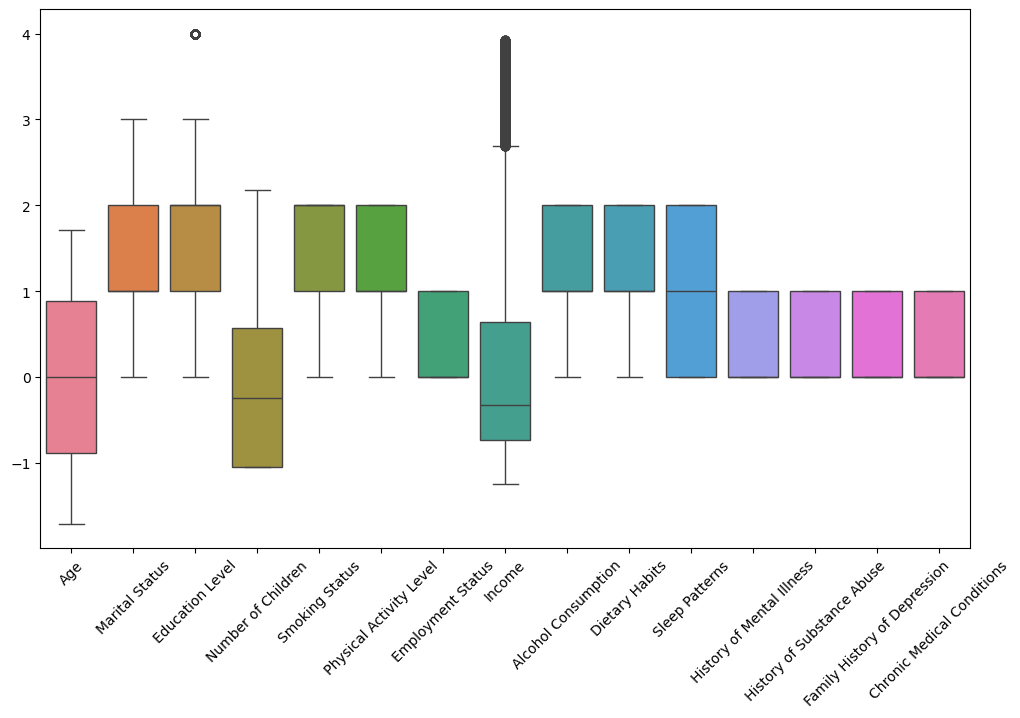

In [28]:
fig, ax = plt.subplots (figsize=(12,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)

#### Berdasarkan hasil yang didapatkan dari visualisasi boxplot terdapat banyak outlier pada kolom income dan 1 outlier di kolom Education Level

### Mengambil kolom yang memiliki outlier

In [31]:
data = df[['Education Level', 'Income']]
data

,Education Level,Income
0,1,-0.600532
1,2,-0.195730
2,3,1.838100
3,3,-1.001105
4,2,-1.035510
...,...,...
413763,3,1.441799
413764,1,1.134778
413765,1,0.657038
413766,0,-0.642590


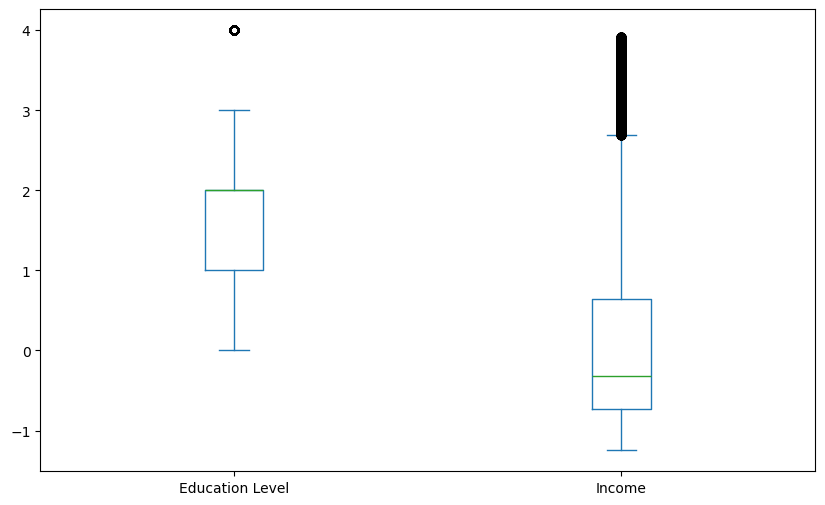

In [32]:
data.plot(kind='box', figsize=(10,6))
plt.show()

### Melakukan Penangan Outlier menggunakan IQR pada kolom income dan education level

In [34]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [35]:
df_iqr = data[-((data < (Q1 - 1.5 * IQR)) | 
          (data > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.shape

(397023, 2)

### Menampilkan data yang sudah ditangani dengan IQR menggunakan visualisasi Boxplot

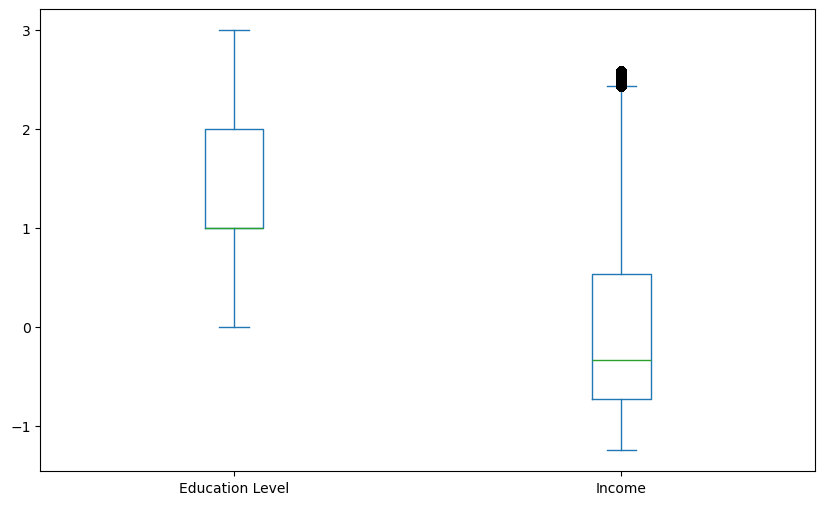

In [37]:
df_iqr.plot(kind='box', figsize=(10,6))
plt.show()

## Visualisasi Data

### Histogram untuk Distribusi Income

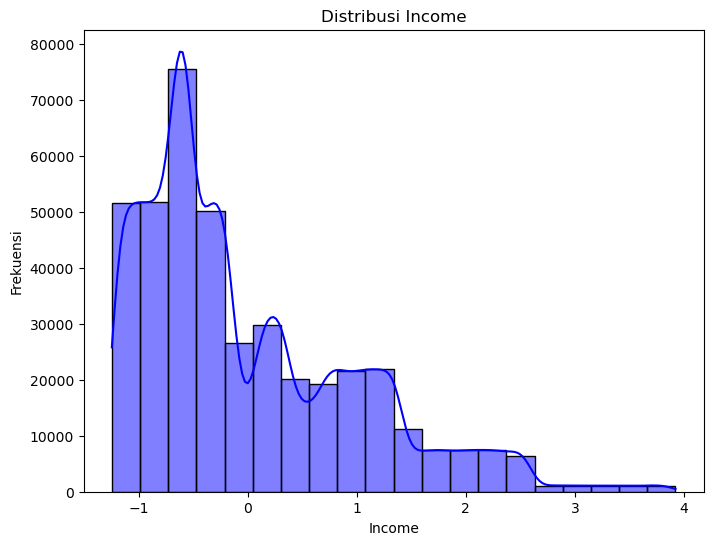

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=20, kde=True, color='blue')
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.ylabel('Frekuensi')
plt.show()

Efektivitas: Histogram efektif untuk menunjukkan distribusi data pendapatan (Income), memberikan gambaran bahwa sebagian besar data terkonsentrasi pada rentang tertentu, dengan distribusi yang cenderung condong ke kanan.

Pilihan Visualisasi: Histogram dipilih karena mampu menunjukkan pola penyebaran data pendapatan secara jelas. Garis lengkung di atas histogram digunakan untuk memperlihatkan pola distribusi secara lebih halus, sehingga mempermudah dalam mengenali pola utama dan melihat data yang mungkin menyimpang.

Wawasan: Sebagian besar individu memiliki pendapatan di rentang nilai -1 hingga 0 (berdasarkan nilai yang telah di normalisasi). Jumlah individu berkurang secara bertahap pada nilai pendapatan yang lebih tinggi. Pola ini menunjukkan bahwa kebanyakan pendapatan terpusat pada kelompok tertentu, sementara ada sedikit individu dengan pendapatan yang lebih tinggi.

Kontribusi: Visualisasi ini dapat digunakan untuk melihat kemungkinan hubungan dengan variabel lain, seperti pola hidup atau faktor risiko tertentu, dan membantu dalam pengelompokan atau analisis yang lebih mendalam.

### Bar Chart untuk Frekuensi Kategori Status Merokok

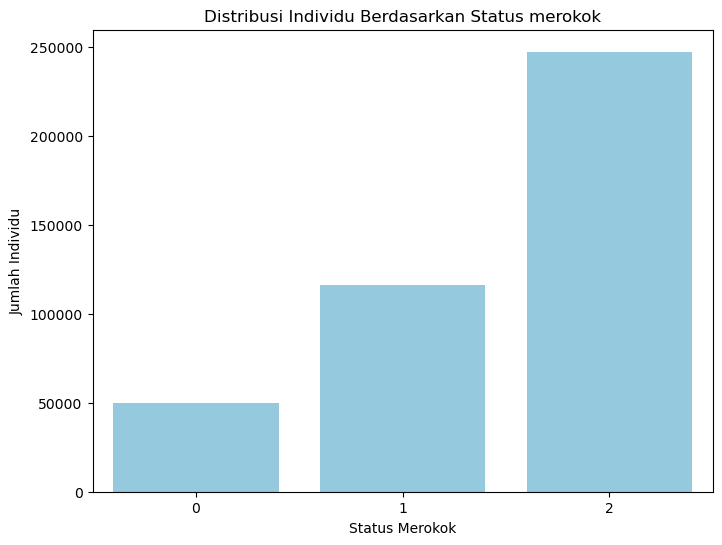

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Smoking Status', color='skyblue')
plt.title('Distribusi Individu Berdasarkan Status merokok')
plt.xlabel('Status Merokok')
plt.ylabel('Jumlah Individu')
plt.xticks()
plt.show()

Efektivitas: Bar chart ini sangat efektif untuk menunjukkan distribusi frekuensi kategorikal status merokok, memberikan gambaran yang jelas tentang jumlah individu pada setiap kategori status merokok (0, 1, dan 2). Visual ini memungkinkan perbandingan langsung antar kategori dengan mudah dan intuitif.

Pilihan Visualisasi: Bar chart merupakan pilihan yang tepat untuk menampilkan data kategorikal seperti ini. Penggunaan warna biru muda yang konsisten membuat visualisasi mudah dibaca, sementara skala pada sumbu y yang dimulai dari 0 memberikan representasi yang akurat tentang perbandingan antar kategori. Lebar bar yang seragam dan jarak antar bar yang proporsional menambah kejelasan visualisasi.

Wawasan: Dari visualisasi terlihat bahwa kategori 2 memiliki frekuensi tertinggi dengan sekitar 250.000 individu, diikuti oleh kategori 1 dengan sekitar 120.000 individu, dan kategori 0 dengan frekuensi terendah sekitar 50.000 individu. Perbedaan yang signifikan antar kategori ini menunjukkan adanya variasi yang besar dalam distribusi status merokok pada populasi yang diteliti.

Kontribusi: Visualisasi ini berkontribusi dalam memahami distribusi populasi berdasarkan status merokok dan dapat digunakan sebagai dasar untuk mengidentifikasi tren serta merencanakan intervensi kesehatan masyarakat yang tepat sasaran. Data ini juga dapat menjadi landasan untuk analisis lebih lanjut tentang faktor-faktor yang mempengaruhi status merokok dalam populasi.

### Line Plot untuk Tren Kualitas Tidur Berdasarkan Usia

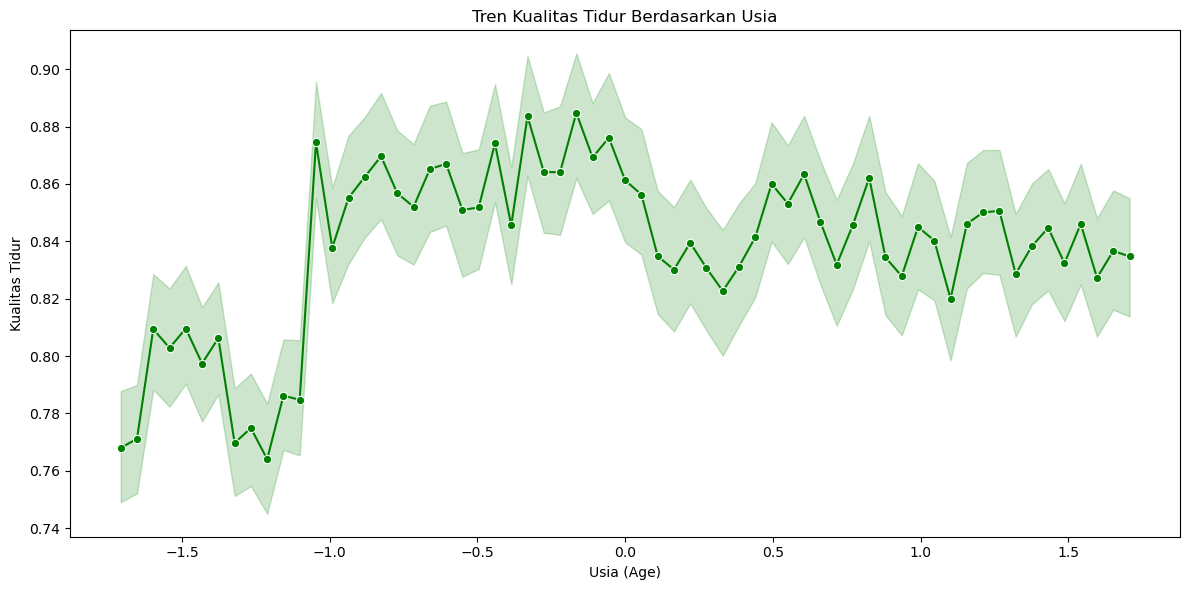

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Sleep Patterns', data=df, marker='o', color='green')

plt.title('Tren Kualitas Tidur Berdasarkan Usia')
plt.xlabel('Usia (Age)')
plt.ylabel('Kualitas Tidur')
plt.tight_layout()
plt.show()

Efektivitas: Line plot dengan confidence interval (area hijau) efektif untuk menunjukkan tren kualitas tidur berdasarkan usia, memberikan gambaran yang jelas tentang perubahan dan variasi kualitas tidur di berbagai kelompok usia yang telah dinormalisasi.

Pilihan Visualisasi: Line plot dipilih karena mampu menampilkan hubungan kontinyu antara usia dan kualitas tidur. Area bayangan hijau menunjukkan interval kepercayaan, membantu memahami tingkat ketidakpastian dalam pengukuran di setiap titik usia.

Wawasan: Grafik menunjukkan peningkatan tajam kualitas tidur pada usia sekitar -1.0, kemudian relatif stabil dengan sedikit fluktuasi di rentang -0.5 hingga 0, dan menunjukkan tren penurunan gradual setelah usia 0.5. Nilai kualitas tidur berkisar antara 0.76 hingga 0.90, dengan puncak tertinggi sekitar 0.88-0.90 pada rentang usia -0.5 hingga 0.

Kontribusi: Visualisasi ini membantu memahami bagaimana kualitas tidur berubah seiring bertambahnya usia, yang dapat digunakan untuk mengidentifikasi kelompok usia yang mungkin memerlukan perhatian khusus dalam hal manajemen tidur dan intervensi kesehatan yang tepat.

### Pie chart untuk Distribusi Status Pernikahan

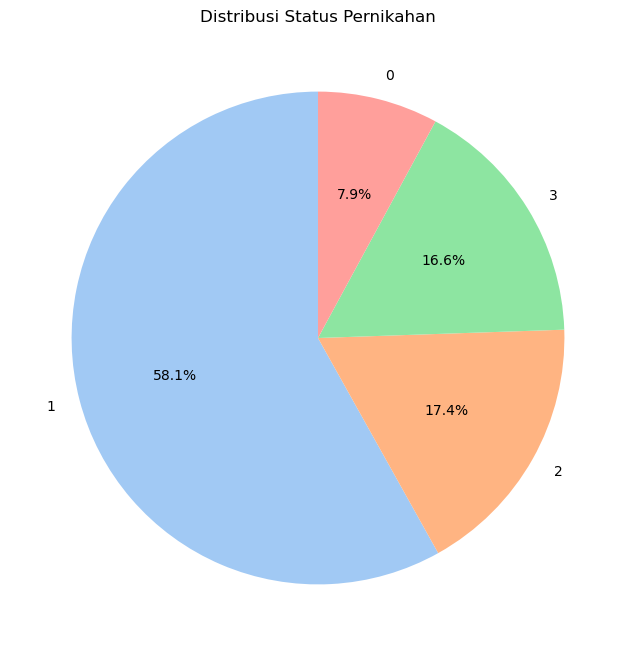

In [49]:
plt.figure(figsize=(8, 8))
df['Marital Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribusi Status Pernikahan')
plt.ylabel('')
plt.show()

Efektivitas: Pie chart efektif untuk menunjukkan proporsi dari status pernikahan, memberikan gambaran yang jelas tentang bagaimana populasi terdistribusi di antara berbagai kategori status pernikahan.

Pilihan Visualisasi: Pie chart dipilih karena mampu menampilkan proporsi relatif antar kategori dengan baik. Penggunaan warna yang berbeda untuk setiap kategori dan label persentase memudahkan pemahaman distribusi data.

Wawasan: Visualisasi menunjukkan bahwa kategori 1 mendominasi dengan 58.1% dari total populasi, diikuti oleh kategori 2 (17.4%) dan kategori 3 (16.6%), sementara kategori 0 memiliki proporsi terkecil sebesar 7.9%. Distribusi ini menunjukkan ketidakseimbangan yang signifikan antar kategori status pernikahan.

Kontribusi: Visualisasi ini memberikan pemahaman cepat tentang komposisi status pernikahan dalam dataset, yang dapat digunakan untuk analisis lebih lanjut tentang hubungannya dengan faktor-faktor lain seperti tingkat depresi atau variabel demografis lainnya.

### Heatmap untuk Matriks Korelasi

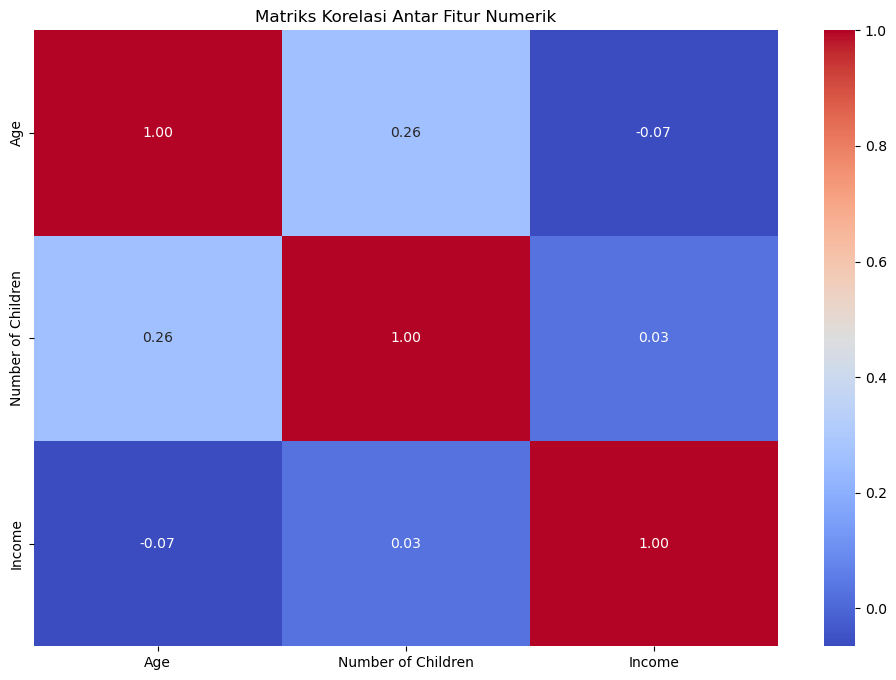

In [52]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

Efektivitas: Matriks korelasi efektif untuk menunjukkan hubungan antar variabel numerik (Age, Number of Children, Income, dan Sleep Patterns), memberikan gambaran bahwa sebagian besar variabel memiliki korelasi yang lemah satu sama lain.

Pilihan Visualisasi: Heatmap dengan gradasi warna merah-biru dipilih karena mampu menunjukkan pola korelasi antar variabel secara jelas. Skala warna menunjukkan interpretasi nilai korelasi, dimana merah menandakan korelasi positif dan biru menandakan korelasi negatif.

Wawasan: Korelasi terkuat terdapat antara Age dan Number of Children dengan nilai 0.26. Income menunjukkan korelasi negatif lemah dengan Age (-0.07) dan Sleep Patterns (-0.05), sedangkan Sleep Patterns memiliki korelasi positif sangat lemah dengan Number of Children (0.10).

Kontribusi: Visualisasi ini membantu memahami hubungan antar variabel dalam dataset dan mengidentifikasi variabel yang berpotensi memiliki hubungan berarti. Rendahnya korelasi menunjukkan bahwa setiap variabel cenderung independen dan memberikan informasi yang unik.

## Question 3: Sub-CLO 3

## Clustering

### Melakukan Clustering menggunakan metode K-Means

In [57]:
X = df[['Age', 'Marital Status', 'Education Level', 'Number of Children', 
        'Smoking Status', 'Physical Activity Level', 'Employment Status', 
        'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', 
        'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions']]

In [58]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Risiko Depresi'] = kmeans.fit_predict(X)
k_means_cluster_centers = kmeans.cluster_centers_
k_means_labels = kmeans.labels_

In [59]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [60]:
jumlah_per_cluster = df['Risiko Depresi'].value_counts()
jumlah_per_cluster

Risiko Depresi
2    213684
1    142759
0     57325
Name: count, dtype: int64

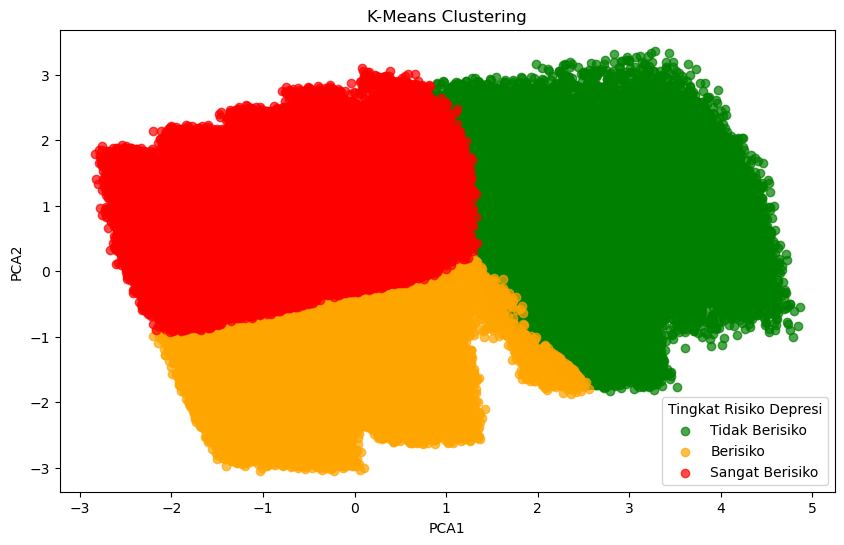

Risiko Depresi
2    213684
1    142759
0     57325
Name: count, dtype: int64

In [61]:
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

colors = ['green', 'orange', 'red']
labels = ['Tidak Berisiko', 'Berisiko', 'Sangat Berisiko']

plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    subset = df[df['Risiko Depresi'] == i]
    plt.scatter(subset['PCA1'], subset['PCA2'], 
                label=label, color=colors[i], alpha=0.7)

plt.title('K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Tingkat Risiko Depresi', loc='best', facecolor='white')
plt.show()

jumlah_per_cluster

Hasil clustering menggunakan algoritma K-Means dengan 3 cluster menunjukkan distribusi tingkat risiko depresi pada individu. Cluster terbanyak adalah kategori "Sangat Berisiko" dengan 213,684 individu, lalu kategori "Berisiko" sebanyak 142,759 individu, dan kategori "Tidak Berisiko" sebanyak 57,325 individu. Visualisasi scatter plot memperlihatkan di mana cluster hijau menunjukkan kelompok tidak berisiko yang berada di sisi kanan, cluster oranye menunjukkan kelompok berisiko yang berada di bagian bawah, dan cluster merah menunjukkan kelompok sangat berisiko yang berada di sisi kiri atas plot. Pemisahan yang jelas ini mengindikasikan bahwa algoritma K-Means berhasil membedakan karakteristik setiap kelompok berdasarkan variabel-variabel yang digunakan dalam analisis.

In [63]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Group,Risiko Depresi,PCA1,PCA2
0,Christine Barker,-0.991298,1,1,0.566692,2,0,1,-0.600532,2,1,0,1,0,1,1,Dewasa,1,-0.514139,-0.880845
1,Jacqueline Lewis,0.330380,1,2,-0.241681,2,2,0,-0.195730,0,2,0,1,0,0,1,Dewasa,2,-0.045190,0.515621
2,Shannon Church,1.596988,3,3,-0.241681,2,2,0,1.838100,1,2,1,0,0,1,0,Senior,0,1.496204,1.894927
3,Charles Jordan,0.495590,0,3,1.375065,2,1,1,-1.001105,2,1,2,0,0,0,0,Dewasa,2,0.157120,1.588542
4,Michael Rich,-1.707206,2,2,-1.050054,2,2,1,-1.035510,1,1,0,1,0,1,1,Muda,1,-0.131090,-1.325085


Hasil dari Clustering membuat kolom baru yaitu 'Risiko Depresi' yang akan menjadi target/label dalam proses klasifikasi. Hal ini dapat membuat model yang dapat memprediksi tingkat risiko depresi (Tidak Berisiko, Berisiko, atau Sangat Berisiko) berdasarkan fitur-fitur yang ada. Model klasifikasi akan belajar dari pola data untuk mengidentifikasi karakteristik yang membedakan setiap kategori risiko.

## Mengambil sample data 10 ribu untuk klasifikasi

In [66]:
data = df.sample(n=10000)
data

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Group,Risiko Depresi,PCA1,PCA2
95875,David Griffin,0.110101,0,4,-1.050054,2,1,1,-1.015539,2,0,0,1,0,0,0,Dewasa,0,1.342858,0.107076
82764,Andrew Williams,1.156429,3,2,0.566692,1,1,0,-0.340046,2,1,1,0,0,1,0,Senior,2,-0.138073,1.006495
336994,Isaiah Martinez,-0.000039,0,4,-1.050054,1,1,1,-1.078829,2,0,0,0,1,0,0,Dewasa,1,1.432809,-0.177199
296312,Heidi Chan,0.881079,3,0,-1.050054,1,2,0,-0.204102,1,2,1,0,1,0,0,Senior,2,-1.552208,-0.333775
75361,Carrie Hammond,-1.156507,2,1,-1.050054,2,1,0,0.417862,2,0,0,0,0,0,0,Muda,1,0.504443,-1.650725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187651,Dawn Marquez,-0.165249,1,2,0.566692,2,2,0,-0.679362,1,1,2,0,1,0,0,Dewasa,2,-0.158064,0.673794
325820,Larry Villanueva DDS,1.101359,1,3,1.375065,2,2,1,-0.788831,1,2,0,1,1,0,0,Senior,2,-0.148331,2.221414
20126,Tina Wagner,-0.385529,0,2,0.566692,2,2,0,-0.638103,0,2,1,0,0,1,0,Dewasa,2,-0.180696,0.592784
204512,David Jordan,-1.321717,2,2,-1.050054,2,1,0,-0.616085,1,1,0,0,0,1,0,Muda,1,0.380905,-1.411299


### Pemilihan Feature

In [68]:
features = ['Age', 'Marital Status', 'Education Level', 'Number of Children', 
        'Smoking Status', 'Physical Activity Level', 'Employment Status', 
        'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns']
X = data[features]
y = data['Risiko Depresi']

Pemilihan fitur dalam model prediksi risiko depresi didasarkan pada faktor sosial dan gaya hidup yang berhubungan erat dengan kesehatan mental, seperti usia, status pernikahan, tingkat pendidikan, jumlah anak, status pekerjaan, serta kebiasaan merokok, tingkat aktivitas fisik, konsumsi alkohol, pola tidur, pendapatan, dan kebiasaan makan. Fitur-fitur ini dipilih karena dapat memengaruhi tingkat stres, kesejahteraan emosional, dan kesehatan fisik yang berhubungan dengan risiko depresi. Sementara itu, target dalam model ini adalah risiko depresi yang diidentifikasi melalui clustering, di mana individu dikelompokkan berdasarkan pola kesamaan pada faktor-faktor tersebut. Hasil clustering ini mengelompokkan individu ke dalam kategori dengan tingkat risiko depresi yang serupa, sehingga memungkinkan untuk menganalisis dan memahami faktor-faktor yang berkontribusi pada risiko depresi masing-masing kelompok.

#### Split Data Train dan Test

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Normalisasi semua fitur yang digunakan untuk klasifikasi

In [73]:
X= preprocessing.StandardScaler().fit(X).transform(X)

## Corss-Validation

In [103]:
for model_name, model in models.items():
    print(f"[INFO] Evaluating '{model_name}' model with Cross-Validation...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-validation Scores (per fold):", cv_scores)
    print("Average Cross-validation Score:", np.mean(cv_scores))
    print("-" * 50)

[INFO] Evaluating 'knn' model with Cross-Validation...
Cross-validation Scores (per fold): [0.94928571 0.96357143 0.94642857 0.96428571 0.95714286]
Average Cross-validation Score: 0.9561428571428572
--------------------------------------------------
[INFO] Evaluating 'svm' model with Cross-Validation...
Cross-validation Scores (per fold): [0.98642857 0.99071429 0.98285714 0.99214286 0.98571429]
Average Cross-validation Score: 0.9875714285714284
--------------------------------------------------


Hasil evaluasi model menggunakan Cross-Validation menunjukkan bahwa model KNN memiliki skor rata-rata 0.9561, dengan skor per lipatan berkisar antara 0.9464 hingga 0.9643, yang menunjukkan kinerja yang konsisten dan baik dalam mengklasifikasikan data. Sementara itu, model SVM menunjukkan kinerja yang lebih unggul dengan skor rata-rata 0.9876, dengan skor per lipatan antara 0.9829 hingga 0.9921. Hal ini menunjukkan bahwa model SVM memberikan hasil yang sangat konsisten dan lebih akurat dibandingkan dengan KNN. Secara keseluruhan, model SVM menunjukkan performa yang lebih unggul dalam hal akurasi prediksi risiko depresi dibandingkan dengan model KNN.

## Klasifikasi

In [75]:
models = {
    "knn": KNeighborsClassifier(),
    "svm": SVC()
}

## Memuat Model KNN (Kelompok)

In [77]:
ml_model = "knn"

print("[INFO] using '{}' model".format(ml_model))
model = models[ml_model]
model.fit(X_train, y_train)

[INFO] using 'knn' model


KNeighborsClassifier()

In [78]:
print("[INFO] evaluating...")
predictions = model.predict(X_train)
print(classification_report(y_train, predictions))

print("Train Set Accuracy: ", round(accuracy_score(y_train,predictions),2))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       956
           1       0.98      0.94      0.96      2390
           2       0.96      0.99      0.97      3654

    accuracy                           0.97      7000
   macro avg       0.98      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000

Train Set Accuracy:  0.97


Hasil evaluasi model KNN pada data train menunjukkan bahwa model KNN memiliki kinerja yang sangat baik dengan akurasi 0.97. Precision, recall, dan f1-score untuk masing-masing kelas juga menunjukkan hasil yang kuat: kelas 0 (risiko depresi rendah) memiliki precision 1.00 dan recall 0.98, kelas 1 (risiko depresi sedang) memiliki precision 0.98 dan recall 0.94, dan kelas 2 (risiko depresi tinggi) memiliki precision 0.96 dan recall 0.99. Nilai f1-score untuk ketiga kelas berada pada rentang 0.96 hingga 0.99, menunjukkan keseimbangan yang baik antara precision dan recall. Secara keseluruhan, model ini mampu mengklasifikasikan data pelatihan dengan sangat baik, menghasilkan accuracy 0.97, dan juga menunjukkan performa yang konsisten dengan nilai macro avg dan weighted avg f1-score masing-masing sebesar 0.97.

### Confusion Matrix dari data Train

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat=confusion_matrix(y_train,predictions)
print(conf_mat)

[[ 938    3   15]
 [   4 2258  128]
 [   0   48 3606]]


### Visualisasi Model

Text(70.72222222222221, 0.5, 'True Labels')

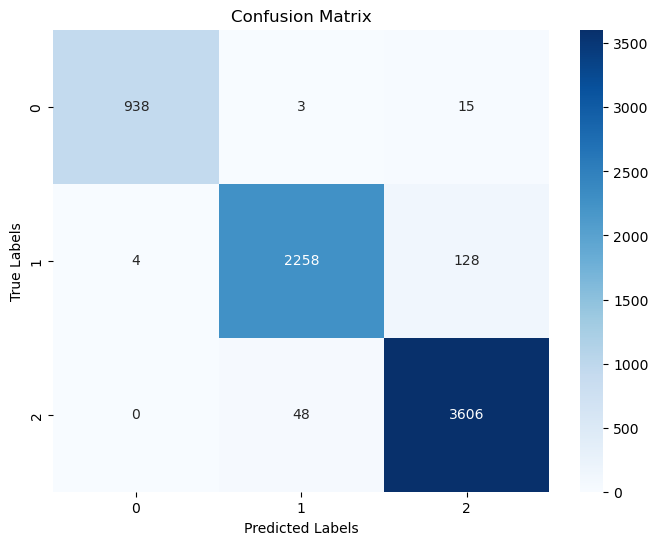

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

Berdasarkan hasil confusion matrix yang didapatkan, model KNN pada data train menunjukkan bahwa untuk kelas 0 (risiko depresi rendah), terdapat 938 True Positive (TP), 3 False Positive (FP), dan 15 False Negative (FN). Untuk kelas 1 (risiko depresi sedang), terdapat 2258 True Positive (TP), 4 False Positive (FP), dan 128 False Negative (FN). Pada kelas 2 (risiko depresi tinggi), terdapat 3606 True Positive (TP), 0 False Positive (FP), dan 48 False Negative (FN). Secara keseluruhan, meskipun ada beberapa kesalahan klasifikasi antar kelas, model ini masih menunjukkan akurasi yang sangat baik dengan prediksi yang sebagian besar benar.

### Evaluasi Model KNN dengan data Test

In [83]:
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

print("Test Set Accuracy: ", round(accuracy_score(y_test,predictions),2))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       450
           1       0.95      0.91      0.93      1037
           2       0.94      0.97      0.96      1513

    accuracy                           0.95      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.95      0.95      0.95      3000

Test Set Accuracy:  0.95


Hasil evaluasi model KNN pada test set menunjukkan bahwa model memiliki kinerja yang sangat baik dengan akurasi 95%. Precision untuk masing-masing kelas sangat tinggi, di mana kelas 0 (risiko depresi rendah) memiliki precision 0.99, kelas 1 (risiko depresi sedang) memiliki precision 0.95, dan kelas 2 (risiko depresi tinggi) memiliki precision 0.94. Recall model juga sangat baik, dengan kelas 0 dan kelas 2 memiliki recall masing-masing 0.99 dan 0.97, menunjukkan bahwa model sangat efektif dalam mendeteksi kelas-kelas ini. Meskipun recall untuk kelas 1 sedikit lebih rendah (0.91), model tetap menunjukkan performa yang kuat. F1-score yang didapatkan, yang merupakan rata-rata harmonis dari precision dan recall, juga menunjukkan hasil yang sangat baik, dengan kelas 0 memiliki f1-score 0.99, kelas 1 0.93, dan kelas 2 0.96. Secara keseluruhan, model ini mampu mengklasifikasikan dengan benar 95% data pada test set, dengan rata-rata makro dan tertimbang f1-score masing-masing sebesar 0.96 dan 0.95, menunjukkan keseimbangan yang baik antara ketepatan dan sensitivitas dalam semua kelas.

### Confusion Matrix dari data Test

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat=confusion_matrix(y_test,predictions)
print(conf_mat)

[[ 444    3    3]
 [   4  945   88]
 [   0   42 1471]]


### Visualisasi Model

Text(70.72222222222221, 0.5, 'True Labels')

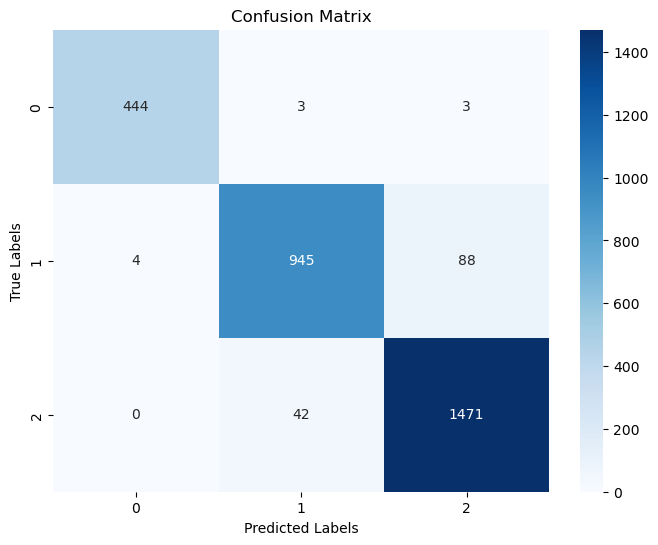

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

Berdasarkan hasil confusion matrix yang didapatkan, model KNN pada data test menunjukkan bahwa untuk kelas 0 (risiko depresi rendah), terdapat 444 True Positive (TP), 3 False Positive (FP), dan 3 False Negative (FN). Untuk kelas 1 (risiko depresi sedang), terdapat 945 True Positive (TP), 4 False Positive (FP), dan 88 False Negative (FN). Pada kelas 2 (risiko depresi tinggi), terdapat 1,471 True Positive (TP), 42 False Positive (FP), dan 0 False Negative (FN). Secara keseluruhan, meskipun ada beberapa kesalahan klasifikasi antar kelas, model ini masih menunjukkan akurasi yang sangat baik dengan prediksi yang sebagian besar benar.

### Mencari akurasi dan k terbaik

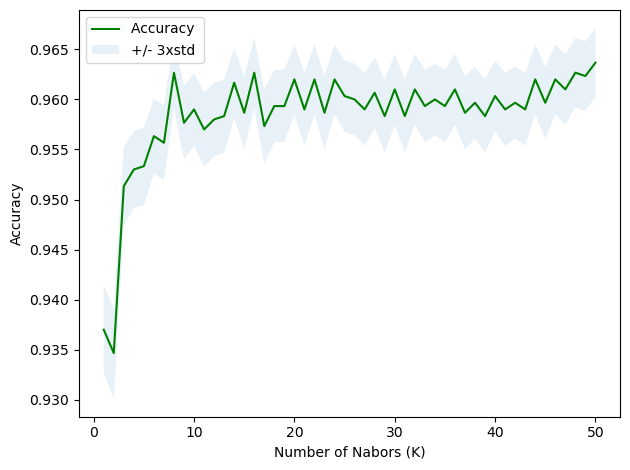

The best accuracy was with 0.9636666666666667 with k= 50


In [88]:
from sklearn import metrics
mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 *
                std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Hasil akurasi terbaik yang diperoleh sebesar 0.963 dengan k=50 menunjukkan bahwa model KNN memberikan performa terbaik saat jumlah tetangga terdekat (k) diset ke 50. Ini berarti bahwa dengan mempertimbangkan 50 tetangga terdekat, model dapat menghasilkan prediksi yang lebih akurat dibandingkan dengan nilai k lainnya yang diuji. Dalam konteks ini, memilih k=50 menunjukkan bahwa model dapat lebih menyeimbangkan antara overfitting dan underfitting, menghasilkan akurasi yang lebih tinggi pada data uji.

## Memuat Model SVM (Individu)

In [91]:
ml_model = "svm"

print("[INFO] using '{}' model".format(ml_model))
model = models[ml_model]
model.fit(X_train, y_train)
joblib.dump(model, 'svm_model.pkl')

[INFO] using 'svm' model


['svm_model.pkl']

In [92]:
print("[INFO] evaluating...")
predictions = model.predict(X_train)
print(classification_report(y_train, predictions))

print("Train Set Accuracy: ", round(accuracy_score(y_train,predictions),2))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       956
           1       1.00      0.99      0.99      2390
           2       0.99      1.00      0.99      3654

    accuracy                           0.99      7000
   macro avg       0.99      0.99      0.99      7000
weighted avg       0.99      0.99      0.99      7000

Train Set Accuracy:  0.99


Hasil evaluasi model SVM pada data train menunjukkan bahwa model memiliki kinerja yang sangat baik dengan akurasinya mencapai 0.99. Untuk kelas 0 (risiko depresi rendah), precision sebesar 0.99, recall 0.99, dan f1-score 0.99 menunjukkan bahwa model sangat akurat dalam mengklasifikasikan kelas ini tanpa banyak kesalahan. Pada kelas 1 (risiko depresi sedang), model memiliki precision 1.00, recall 0.99, dan f1-score 0.99, yang berarti model sangat tepat dalam mengidentifikasi data kelas 1, meskipun ada sedikit kesalahan prediksi. Untuk kelas 2 (risiko depresi tinggi), precision 0.99, recall 1.00, dan f1-score 0.99 menunjukkan bahwa model sangat baik dalam mengklasifikasikan individu dengan risiko depresi tinggi. Secara keseluruhan, model menunjukkan hasil yang konsisten dan sangat baik di seluruh kelas, dengan macro avg dan weighted avg yang masing-masing mencapai 0.99, yang menunjukkan model mampu mengklasifikasikan data dengan akurasi yang sangat tinggi pada data train.

### Confusion Matrix dari data Train

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat=confusion_matrix(y_train,predictions)
print(conf_mat)

[[ 942    0   14]
 [   9 2361   20]
 [   0    8 3646]]


### Visualisasi Model

Text(70.72222222222221, 0.5, 'True Labels')

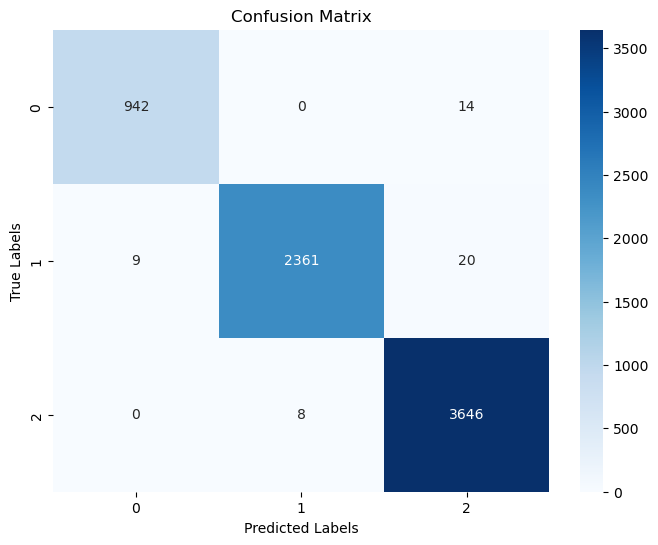

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

Berdasarkan hasil confusion matrix yang didapatkan, model SVM pada data train menunjukkan bahwa untuk kelas 0 (risiko depresi rendah), terdapat 942 True Positive (TP), 0 False Positive (FP), dan 14 False Negative (FN). Untuk kelas 1 (risiko depresi sedang), terdapat 2361 True Positive (TP), 9 False Positive (FP), dan 20 False Negative (FN). Pada kelas 2 (risiko depresi tinggi), terdapat 3646 True Positive (TP), 0 False Positive (FP), dan 8 False Negative (FN). Secara keseluruhan, meskipun ada beberapa kesalahan klasifikasi antar kelas, model ini masih menunjukkan akurasi yang sangat baik dengan prediksi yang sebagian besar benar

### Evaluasi Model SVM dengan data Test

In [97]:
print("[INFO] evaluating...")
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

print("Test Set Accuracy: ", round(accuracy_score(y_test,predictions),2))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       450
           1       0.98      0.97      0.98      1037
           2       0.98      0.99      0.99      1513

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Test Set Accuracy:  0.98


Hasil evaluasi model SVM pada data test menunjukkan kinerja yang sangat baik dengan akurasinya mencapai 0.98. Untuk kelas 0 (risiko depresi rendah), precision 0.99, recall 0.99, dan f1-score 0.99 menunjukkan bahwa model sangat tepat dalam mengklasifikasikan data kelas 0, meskipun ada sedikit kesalahan dalam identifikasi (beberapa data kelas 0 salah diklasifikasikan sebagai kelas lain). Pada kelas 1 (risiko depresi sedang), precision 0.98, recall 0.97, dan f1-score 0.98 menunjukkan bahwa model juga sangat baik dalam mengklasifikasikan kelas 1, meskipun ada sedikit kesalahan prediksi. Untuk kelas 2 (risiko depresi tinggi), model memiliki precision 0.98, recall 0.99, dan f1-score 0.99, yang berarti model sangat akurat dalam mengklasifikasikan kelas 2 dengan sedikit kesalahan. Secara keseluruhan, model ini menunjukkan performa yang sangat baik dengan macro avg dan weighted avg masing-masing mencapai 0.98, menunjukkan konsistensi dalam mengklasifikasikan data dengan akurasi yang tinggi pada seluruh kelas

### Confusion Matrix dari data Test

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat=confusion_matrix(y_test,predictions)
print(conf_mat)

[[ 446    2    2]
 [   5 1006   26]
 [   0   15 1498]]


### Visualisasi Model

Text(70.72222222222221, 0.5, 'True Labels')

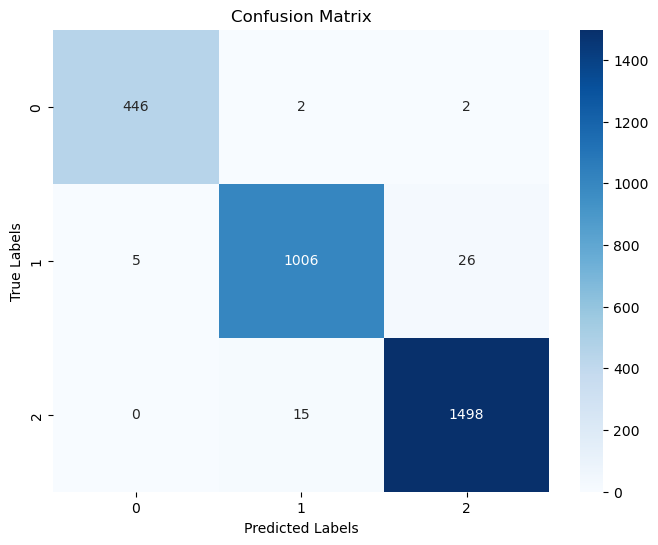

In [100]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

Berdasarkan hasil confusion matrix yang didapatkan, model SVM pada data test menunjukkan bahwa untuk kelas 0 (risiko depresi rendah), terdapat 446 True Positive (TP), 2 False Positive (FP), dan 2 False Negative (FN). Untuk kelas 1 (risiko depresi sedang), terdapat 1006 True Positive (TP), 5 False Positive (FP), dan 26 False Negative (FN). Pada kelas 2 (risiko depresi tinggi), terdapat 1498 True Positive (TP), 0 False Positive (FP), dan 15 False Negative (FN). Secara keseluruhan, model ini menunjukkan performa yang baik dengan sebagian besar prediksi yang benar, meskipun terdapat beberapa kesalahan klasifikasi kecil antar kelas.

## Visualisasi Akhir menggunakan Spider Chart

In [106]:
data_grouped= df.groupby('Risiko Depresi')[features].mean()

In [107]:
data_grouped.reset_index(inplace=True)
risk_levels = data_grouped['Risiko Depresi'].unique()

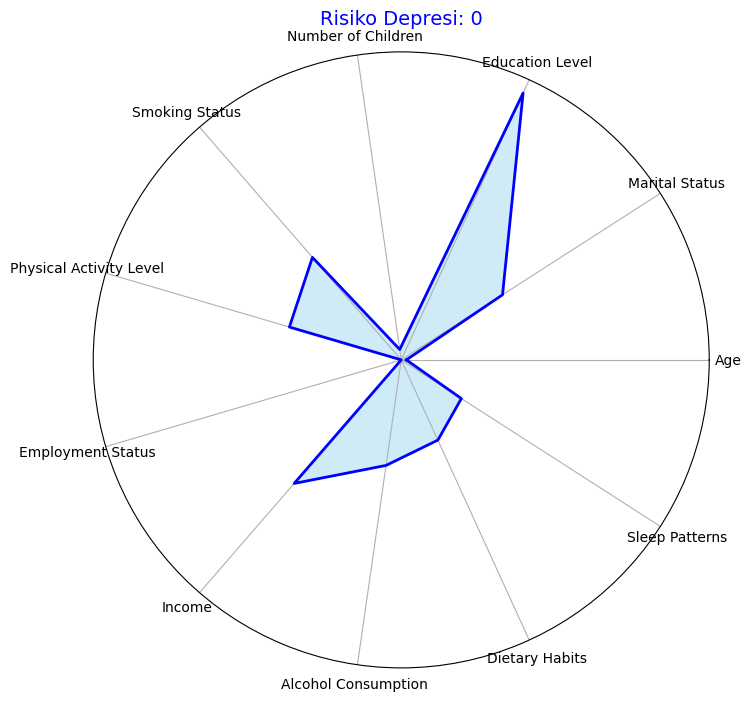

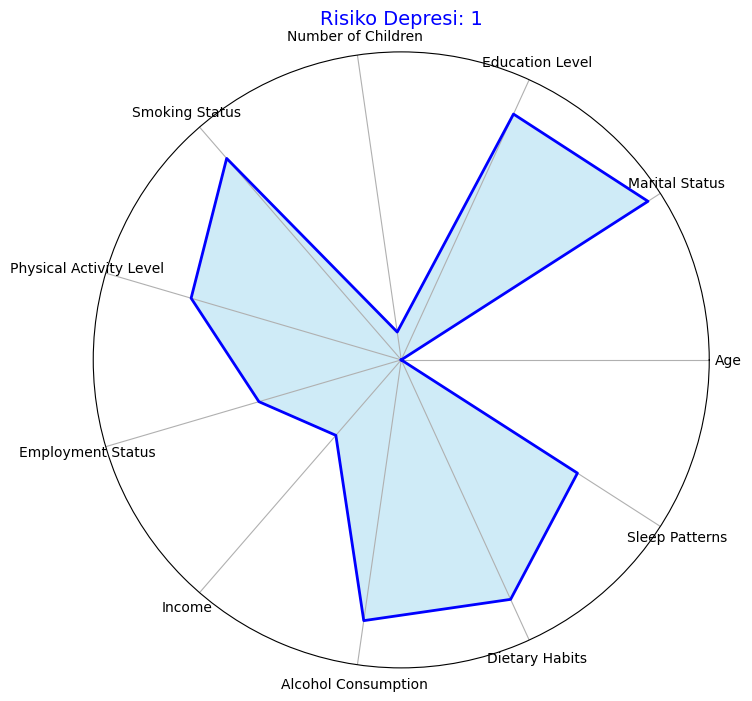

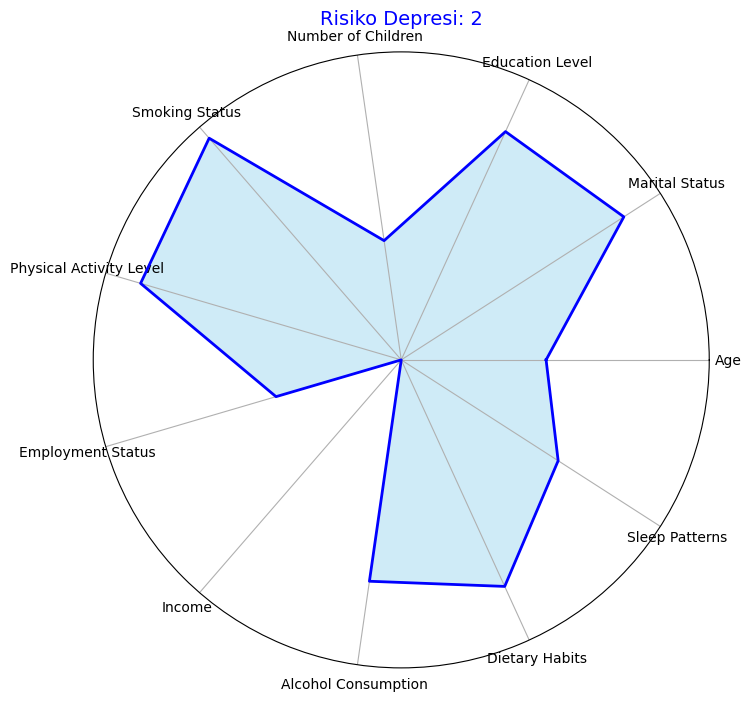

In [108]:
for risk_level in risk_levels:
    try:
        cluster_data = data_grouped[data_grouped['Risiko Depresi'] == risk_level][features].iloc[0]
        
        scaler = StandardScaler()
        values = scaler.fit_transform(cluster_data.values.reshape(-1, 1)).flatten()
        values = (values - values.min()) / (values.max() - values.min()) 
        values = values.tolist() + [values[0]] 

        categories = features
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        angles += angles[:1]

        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
        ax.fill(angles, values, color='skyblue', alpha=0.4)
        ax.plot(angles, values, color='blue', linewidth=2)
        ax.set_yticks([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=10)

        plt.title(f'Risiko Depresi: {risk_level}', size=14, color='blue', pad=20)
        plt.show()
    except IndexError:
        print(f"Tidak ada data untuk Risiko Depresi {risk_level}.")

Berdasarkan hasil visualisasi menggunakan spider chart untuk faktor risiko depresi, terdapat tiga kategori yang menunjukkan tingkat risiko yang berbeda.

Pada tingkat Risiko Depresi 0 (tidak berisiko) ditandai dengan area diagram yang sempit, dimana faktor pendidikan menunjukkan nilai tertinggi, diikuti dengan Income, pola aktivitas fisik dan Smoking status. Faktor-faktor lain seperti status perkawinan, usia, pola tidur, dan status pekerjaan, dll menunjukkan nilai yang relatif rendah, mengindikasikan kondisi yang stabil dan seimbang.

Untuk Risiko Depresi 1 (berisiko) memperlihatkan area diagram yang lebih luas, dengan peningkatan signifikan pada status perkawinan dan tingkat pendidikan. Terjadi pula penurunan income dan peningkatan pada status merokok, tingkat aktivitas fisik, dan pola tidur. Hal ini menunjukkan mulai adanya ketidakseimbangan dalam berbagai aspek kehidupan yang dapat memicu risiko depresi.

Pada Risiko Depresi 2 (sangat berisiko) menampilkan area diagram paling luas, dengan nilai tinggi pada hampir semua faktor terutama status perkawinan, status merokok, tingkat aktivitas fisik, dan pola makan. Terjadi juga penurunan yang extrim pada income. Diagram ini menunjukkan peningkatan signifikan pada pola tidur dan tingkat pendidikan, mengindikasikan kompleksitas faktor yang berkontribusi terhadap tingginya risiko depresi.

----

## Question 4: Sub-CLO 4

## <div align="center"> Kesimpulan </div>

Pada project kelompok, model KNN (K-Nearest Neighbors) digunakan untuk mengklasifikasikan risiko depresi dengan hasil akurasi 0.94. Meskipun KNN memberikan hasil yang cukup baik, pada penelitian ini, saya menerapkan SVM (Support Vector Machine) sebagai algoritma klasifikasi, yang secara signifikan memberikan performa lebih tinggi dengan akurasi mencapai 0.98. Pendekatan perbandingan algoritma ini bertujuan untuk menguji apakah penerapan SVM dapat melampaui kinerja KNN yang digunakan dalam proyek sebelumnya. Hasilnya, SVM terbukti lebih efektif dalam mengklasifikasikan risiko depresi berdasarkan karakteristik sosial-demografi dan gaya hidup individu, dengan akurasi yang lebih stabil dan lebih tinggi. Selain itu, SVM juga lebih mampu menangani data yang lebih kompleks dengan margin yang lebih baik, mengurangi kesalahan klasifikasi dan meningkatkan presisi model. Dengan demikian, penelitian ini berhasil mengungguli performa model sebelumnya dan memberikan hasil yang lebih optimal dalam mengidentifikasi risiko depresi, yang dapat memberikan wawasan lebih dalam bagi praktisi kesehatan mental. Pendekatan perbandingan algoritma ini menunjukkan bahwa pemilihan algoritma yang tepat sangat penting dalam mencapai hasil yang lebih baik dalam analisis data dan prediksi risiko depresi.

----

In [117]:
studentName2 = "Delista Dwi Widyastuti"
studentNIM2 = "00000105174"
studentClass2 = "IS388-DL"

In [119]:
print("Name: \t\t{}".format(studentName2))
print("NIM: \t\t{}".format(studentNIM2))
print("Class: \t\t{}".format(studentClass2))
print("End: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Delista Dwi Widyastuti
NIM: 		00000105174
Class: 		IS388-DL
End: 		2024-12-25 15:59:05.950256
Device ID: 	7ec911e9-c29e-11ef-a496-c01850591c47


----